# Data Preparation
* In this file we will prepare the data that we will use to predict the valence of songs.
* We will use two data sources in the particular analysis:
  * [Spotify's Web API](https://developer.spotify.com/documentation/web-api/): Spotify offers numerous metrics for every song through its API. Specifically, we will use [Get Tracks' Audio Features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features) and [Get Track's Audio Analysis](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis) operations.
  * [Spotify-Data 1921-2020](https://www.kaggle.com/ektanegi/spotifydata-19212020) from [Kaggle](https://www.kaggle.com/). We will use this to get the Spotify ids from many songs.

## Import packages
* To begin with, we will import the packages, that we will use in the following segments of the project:
    * [pandas](https://pandas.pydata.org/)
    * [matplotlib](https://matplotlib.org/)
    * [NumPy](https://www.numpy.org/)
    * [Spotipy](https://spotipy.readthedocs.io/en/2.19.0/)
* Note that the prementioned packages **must be locally installed too** in order to be used.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

%matplotlib inline

## Kaggle Dataset
* Let's first read the data from the dataset.

In [2]:
df = pd.read_csv('data/archive.zip')
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


* We want only to **keep only the unique ids** from the dataset, as we will collect all the other from the API of Spotify.
* We will do this in order to be sure that we have data that are **valid** and **up to date**.
* So, let's find the unique ids.

In [3]:
ids = df['id'].drop_duplicates()
len(ids)

169909

* We will move on with our analysis using a random sample of 55000 rows of this dataset.

In [4]:
ids = ids.sample(55000, random_state=1)

## Data from Spotify API
* Now we will start loading data from the API of Spotify.

### Spotify for Developers Credentials
* In case a user of this notebook wants to execute the cells that create a connection with the [Spotify's Web API](https://developer.spotify.com/documentation/web-api/) it is necessary to create an application at http://developer.spotify.com.
* In that way the user will get a client ID and a client secret.
* Then, they have to create a file `spotify_config.py` with the following contents:

  ```
  config = {
      'client_id' : 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX',
      'client_secret' :'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'
  }
  ```
  where instead of Xs there are the client ID and client secret of the user.
* This file will be placed in the same folder as this notebook.

### Audio Features
* First, we will get the basic song features, using [Get Tracks' Audio Features](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-several-audio-features).
* So, let's do this.

In [5]:
from spotify_config import config

client_credentials_manager = SpotifyClientCredentials(config['client_id'],
                                                      config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

features = {}
start = 0
num_tracks = 100
while start < len(ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200
getting from 1200 to 1300
getting from 1300 to 1400
getting from 1400 to 1500
getting from 1500 to 1600
getting from 1600 to 1700
getting from 1700 to 1800
getting from 1800 to 1900
getting from 1900 to 2000
getting from 2000 to 2100
getting from 2100 to 2200
getting from 2200 to 2300
getting from 2300 to 2400
getting from 2400 to 2500
getting from 2500 to 2600
getting from 2600 to 2700
getting from 2700 to 2800
getting from 2800 to 2900
getting from 2900 to 3000
getting from 3000 to 3100
getting from 3100 to 3200
getting from 3200 to 3300
getting from 3300 to 3400
getting from 3400 to 3500
getting from 3500 to 3600
getting from 3600 to 3700
getting from 3700 to 3800
getting from 3800 to 3900
getting

getting from 30100 to 30200
getting from 30200 to 30300
getting from 30300 to 30400
getting from 30400 to 30500
getting from 30500 to 30600
getting from 30600 to 30700
getting from 30700 to 30800
getting from 30800 to 30900
getting from 30900 to 31000
getting from 31000 to 31100
getting from 31100 to 31200
getting from 31200 to 31300
getting from 31300 to 31400
getting from 31400 to 31500
getting from 31500 to 31600
getting from 31600 to 31700
getting from 31700 to 31800
getting from 31800 to 31900
getting from 31900 to 32000
getting from 32000 to 32100
getting from 32100 to 32200
getting from 32200 to 32300
getting from 32300 to 32400
getting from 32400 to 32500
getting from 32500 to 32600
getting from 32600 to 32700
getting from 32700 to 32800
getting from 32800 to 32900
getting from 32900 to 33000
getting from 33000 to 33100
getting from 33100 to 33200
getting from 33200 to 33300
getting from 33300 to 33400
getting from 33400 to 33500
getting from 33500 to 33600
getting from 33600 t

* Let's see if there are any tracks that no features were returned.

In [6]:
for k in features.keys():
  if not features[k]:
    print(k)

* No such tracks were found.
* We can now create a new dataframe that contains the features of the tracks.

In [7]:
tracks = pd.DataFrame.from_dict(features, orient='index')
tracks.set_index('id', inplace=True)
tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
id,,,,,,,,,,,,,,,,,
0AJfVstyUONRJhyYgTkHMR,0.253,0.385,7,-8.031,0,0.0341,0.729,0.000000,0.0428,0.6460,203.512,audio_features,spotify:track:0AJfVstyUONRJhyYgTkHMR,https://api.spotify.com/v1/tracks/0AJfVstyUONR...,https://api.spotify.com/v1/audio-analysis/0AJf...,161000,4
1V3NH8aYfFyRjfNOHgoX3G,0.219,0.222,9,-16.941,1,0.0390,0.978,0.000149,0.0837,0.0632,72.999,audio_features,spotify:track:1V3NH8aYfFyRjfNOHgoX3G,https://api.spotify.com/v1/tracks/1V3NH8aYfFyR...,https://api.spotify.com/v1/audio-analysis/1V3N...,219707,3
4kfEy7h6bWBS5OaDpccTap,0.846,0.651,7,-5.481,0,0.1280,0.634,0.000000,0.1250,0.5810,140.048,audio_features,spotify:track:4kfEy7h6bWBS5OaDpccTap,https://api.spotify.com/v1/tracks/4kfEy7h6bWBS...,https://api.spotify.com/v1/audio-analysis/4kfE...,223921,4
7qgM0MdETmhd3mORTqvJRm,0.398,0.255,10,-11.205,1,0.0373,0.944,0.000003,0.1140,0.3860,83.883,audio_features,spotify:track:7qgM0MdETmhd3mORTqvJRm,https://api.spotify.com/v1/tracks/7qgM0MdETmhd...,https://api.spotify.com/v1/audio-analysis/7qgM...,246573,4
1HtgEaqki4dFclmVJlJDx1,0.612,0.579,5,-7.264,1,0.0269,0.606,0.000009,0.3530,0.8100,136.641,audio_features,spotify:track:1HtgEaqki4dFclmVJlJDx1,https://api.spotify.com/v1/tracks/1HtgEaqki4dF...,https://api.spotify.com/v1/audio-analysis/1Htg...,195531,4


* Let's make sure that our dataframe contains only songs.

In [8]:
tracks['type'].value_counts()

audio_features    55000
Name: type, dtype: int64

* We will now also drop all the columns that won't be useful for our analysis.

In [9]:
tracks.drop(columns=['type', 'uri', 'track_href', 'analysis_url'], inplace=True)

* Let's also create a histogram of the valence in the dataset.

<AxesSubplot:>

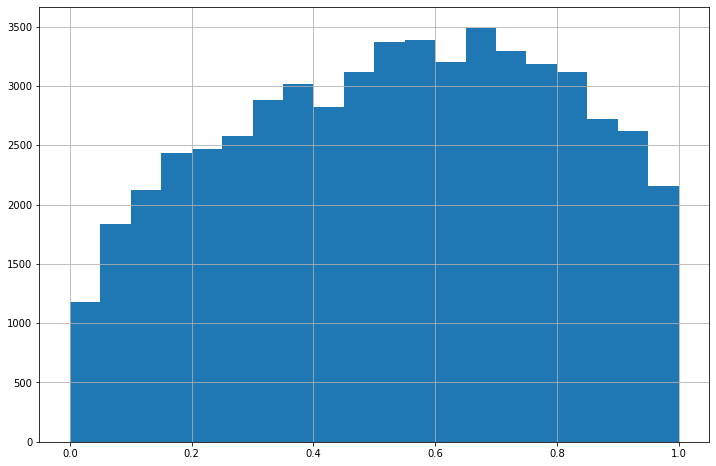

In [10]:
tracks['valence'].hist(bins=20, figsize=(12, 8))

* The distribution seems to be relatively balanced, so we can move on with our analysis.

### Audio Analysis
* We also want to get analysis data that the Spotify provides for each song.
* More information about the data available can be found at [Get Track's Audio Analysis](https://developer.spotify.com/documentation/web-api/reference/#/operations/get-audio-analysis).
* In this analysis we will focus on the <code>segments</code> (from the documentation "*Each segment contains a roughly conisistent sound throughout its duration.*").
* The idea here is that we want to capture information about the rhythm and the listening of the song.
* For each track we will obtain two batches of segments, with the size of 200. The first one will be taken from the beginning and the second one from a more middlish part of the song.
* Now for each segment we will take:
  * **pitches**: "*a “chroma” vector, corresponding to the 12 pitch classes C, C#, D to B, with values ranging from 0 to 1 that describe the relative dominance of every pitch in the chromatic scale*"
  * **timbre**: "*Timbre is the quality of a musical note or sound that distinguishes different types of musical instruments, or voices ... The timbre feature is a vector that includes 12 unbounded values roughly centered around 0.*"
  * **loudness_max, loudness_start, loudness_max_duration**: "*... these components can be used to describe the "attack" of the segment.*"
  * **duration**: "*The duration (in seconds) of the segment.*"
  
*From Spotify's Documentation*
* The loading of the analyses is time consuming and was parallelized on [Google Colab](https://colab.research.google.com/). Below is presented the code used.


In [ ]:
analysis_array_start = np.empty((55000, 200, 28))
analysis_array_mid = np.empty((55000, 200, 28))
ids_taken = np.empty(55000, dtype=object)
track_ids = tracks.index

i = 0
gotten = 0
while i < len(track_ids):
    track_id = track_ids[i]
    if i % 100 == 0:
      print(i)
    try:
      track_analysis= sp.audio_analysis(track_id)
      track_array_start = np.empty((200, 28))
      track_array_mid = np.empty((200, 28))
      segment_features = np.empty(28)
      segments = track_analysis['segments']
      mid_start = int((len(segments) - 200)/2) if len(segments) > 200 else 0
      segments_taken = 0
      for seg in segments:
        segment_features = np.concatenate((seg['pitches'], seg['timbre'], np.array((seg['loudness_start'], 
                                                                                    seg['loudness_max'], 
                                                                                    seg['loudness_max_time'], 
                                                                                    seg['duration']))))

        track_array_start[segments_taken] = segment_features

        segments_taken += 1
        if segments_taken == 200:
          break
        
      if segments_taken < 200:
        segment_features.fill(0)
        while segments_taken < 200:
          track_array_start[segments_taken] = segment_features
          segments_taken +=1
      
      if mid_start == 0:
        track_array_mid = track_array_start
      else:
        segments_taken = 0
        for seg in segments[mid_start:]:
          segment_features = np.concatenate((seg['pitches'], seg['timbre'], np.array((seg['loudness_start'], 
                                                                                    seg['loudness_max'], 
                                                                                    seg['loudness_max_time'], 
                                                                                    seg['duration']))))

          track_array_mid[segments_taken] = segment_features

          segments_taken += 1
          if segments_taken == 200:
            break
          
        if segments_taken < 200:
          segment_features.fill(0)
          while segments_taken < 200:
            track_array_mid[segments_taken] = segment_features
            segments_taken +=1
      
      analysis_array_start[gotten] = track_array_start
      analysis_array_mid[gotten] = track_array_mid
      ids_taken[gotten] = track_id
      gotten += 1
    except:
      print(f'Could not take analysis for {track_id}.')
    i += 1

* We will throw away the empty rows of the arrays.

In [ ]:
count_analyses = np.count_nonzero(ids_taken)
ids_taken = ids_taken[:count_analyses]
analysis_array_start = analysis_array_start[:count_analyses]
analysis_array_mid = analysis_array_mid[:count_analyses]

* We will also keep only the rows of the <code>tracks</code> dataframe, that refer to songs that their analysis was found.

In [ ]:
tracks = tracks.filter(items=ids_taken, axis=0)
len(tracks)

54994

## Data Extraction
* We will save data into files.

In [11]:
tracks.to_csv(r'data/tracks.csv', index=False)
np.save('data/analysis_array_start.npy', analysis_array_start)
np.save('data/analysis_array_mid.npy', analysis_array_mid)
np.save('data/ids_taken.npy', ids_taken)